In [1]:
!pip install seaborn
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
#dependecies
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
from datetime import datetime
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import sys
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = []
with open("transactions.txt") as file:
    for f in file:
        json_string = json.loads(f)
        data.append(json_string)

In [4]:
#converting data to DataFrame
data_df = pd.DataFrame(data)

In [5]:
print(len(pd.unique(data_df['customerId'])))

5000


In [6]:
#printing the information from the dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
#check again if there is any null values
data_df.isnull().values.any()

False

In [8]:
#now to see which features has this empty objects, the uniqu values for each feature
for i in data_df:
    print(i, "Column has unique values such as :", data_df[i].unique())
    print("------"*18)

accountNumber Column has unique values such as : ['737265056' '830329091' '574788567' ... '899818521' '638498773'
 '732852505']
------------------------------------------------------------------------------------------------------------
customerId Column has unique values such as : ['737265056' '830329091' '574788567' ... '899818521' '638498773'
 '732852505']
------------------------------------------------------------------------------------------------------------
creditLimit Column has unique values such as : [ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]
------------------------------------------------------------------------------------------------------------
availableMoney Column has unique values such as : [ 5000.    4990.63  4959.25 ... 48766.15 48716.72 48666.83]
------------------------------------------------------------------------------------------------------------
transactionDateTime Column has unique values such as : ['2016-08-13T14:27:32' '201

enteredCVV Column has unique values such as : ['414' '486' '885' '206' '579' '539' '205' '265' '640' '670' '240' '630'
 '140' '679' '773' '173' '783' '713' '774' '483' '438' '433' '741' '808'
 '736' '779' '250' '440' '260' '746' '853' '726' '147' '418' '142' '172'
 '310' '436' '557' '264' '402' '202' '505' '570' '307' '470' '665' '781'
 '737' '337' '734' '692' '519' '717' '995' '311' '356' '350' '915' '197'
 '676' '647' '866' '461' '551' '555' '529' '329' '225' '255' '625' '671'
 '581' '963' '903' '593' '215' '956' '655' '209' '203' '269' '207' '128'
 '258' '688' '788' '981' '951' '481' '931' '236' '161' '151' '051' '277'
 '965' '449' '930' '317' '798' '367' '220' '120' '296' '395' '822' '596'
 '475' '584' '619' '219' '143' '613' '649' '615' '612' '019' '287' '639'
 '950' '365' '753' '067' '867' '327' '610' '603' '940' '510' '270' '180'
 '480' '993' '939' '343' '353' '227' '154' '284' '127' '266' '261' '666'
 '681' '661' '455' '340' '905' '896' '295' '210' '985' '217' '897' '945'
 '485

In [9]:
#dropping unnecessary columns which are filled with all empty string object

data_updated = data_df.drop(['recurringAuthInd', 'posOnPremises', 'merchantZip', 'merchantState', 'merchantState', 'merchantCity', 'echoBuffer'], axis = 1)

In [10]:
#finding the most correlated columns
corrmat = data_updated.corr()

Text(0.5, 1.0, 'Correlation heatmap for the features')

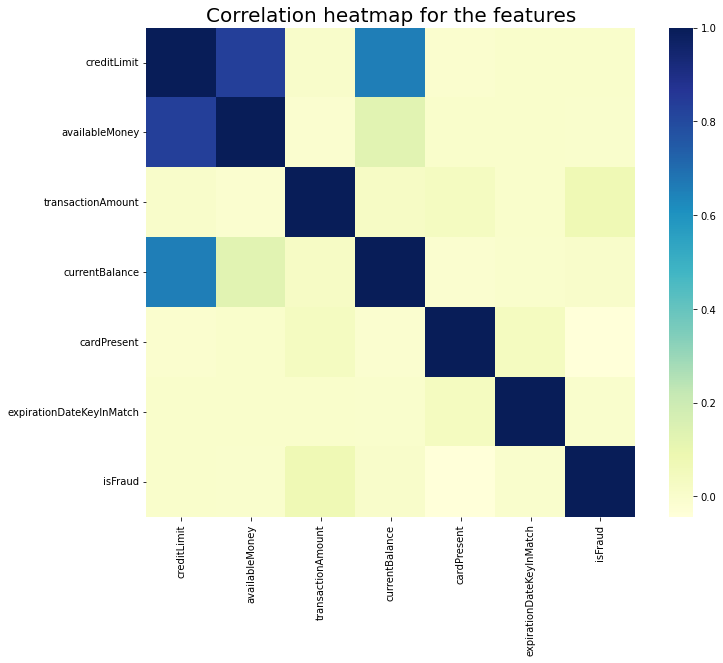

In [11]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap for the features', fontsize=20)

In [12]:
#decide if want to drop the highly correlated features

In [13]:
#account number and customerid carries same information 

data_updated = data_updated.drop(['customerId'], axis = 1)

In [14]:
for columns in data_updated:
    data_updated[columns].loc[data_updated[columns] == ''] = None

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
#unique values after removing the empty spaces with none (handling categorical values)
for i in data_updated:
    print(i, "Column has unique values such as :", data_updated[i].unique())
    print("------"*18)

accountNumber Column has unique values such as : ['737265056' '830329091' '574788567' ... '899818521' '638498773'
 '732852505']
------------------------------------------------------------------------------------------------------------
creditLimit Column has unique values such as : [ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]
------------------------------------------------------------------------------------------------------------
availableMoney Column has unique values such as : [ 5000.    4990.63  4959.25 ... 48766.15 48716.72 48666.83]
------------------------------------------------------------------------------------------------------------
transactionDateTime Column has unique values such as : ['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39' ...
 '2016-12-27T15:46:24' '2016-12-29T00:30:55' '2016-12-30T20:10:29']
------------------------------------------------------------------------------------------------------------
transactionAm

cardLast4Digits Column has unique values such as : ['1803' '767' '3143' ... '4635' '3783' '3388']
------------------------------------------------------------------------------------------------------------
transactionType Column has unique values such as : ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' None]
------------------------------------------------------------------------------------------------------------
currentBalance Column has unique values such as : [   0.      9.37   40.75 ... 1095.04 1214.96 1233.85]
------------------------------------------------------------------------------------------------------------
cardPresent Column has unique values such as : [0. 1.]
------------------------------------------------------------------------------------------------------------
expirationDateKeyInMatch Column has unique values such as : [0. 1.]
------------------------------------------------------------------------------------------------------------
isFraud Column has unique v

In [16]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   creditLimit               786363 non-null  float64
 2   availableMoney            786363 non-null  float64
 3   transactionDateTime       786363 non-null  object 
 4   transactionAmount         786363 non-null  float64
 5   merchantName              786363 non-null  object 
 6   acqCountry                781801 non-null  object 
 7   merchantCountryCode       785639 non-null  object 
 8   posEntryMode              782309 non-null  object 
 9   posConditionCode          785954 non-null  object 
 10  merchantCategoryCode      786363 non-null  object 
 11  currentExpDate            786363 non-null  object 
 12  accountOpenDate           786363 non-null  object 
 13  dateOfLastAddressChange   786363 non-null  o

In [17]:
#one of the techniques to deal with that is to create a seperate category for the empty string object
data_updated = data_updated.fillna(value = "unknown")

In [18]:
##checking if the new category has been added to the data

for i in data_updated:
    print(i, "Column has unique values such as :", data_updated[i].unique(), "And the total unique values will be :", len(data_updated[i].unique()))
    print("------"*18)

accountNumber Column has unique values such as : ['737265056' '830329091' '574788567' ... '899818521' '638498773'
 '732852505'] And the total unique values will be : 5000
------------------------------------------------------------------------------------------------------------
creditLimit Column has unique values such as : [ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.] And the total unique values will be : 10
------------------------------------------------------------------------------------------------------------
availableMoney Column has unique values such as : [ 5000.    4990.63  4959.25 ... 48766.15 48716.72 48666.83] And the total unique values will be : 521916
------------------------------------------------------------------------------------------------------------
transactionDateTime Column has unique values such as : ['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39' ...
 '2016-12-27T15:46:24' '2016-12-29T00:30:55' '2016-12-30T20:1

enteredCVV Column has unique values such as : ['414' '486' '885' '206' '579' '539' '205' '265' '640' '670' '240' '630'
 '140' '679' '773' '173' '783' '713' '774' '483' '438' '433' '741' '808'
 '736' '779' '250' '440' '260' '746' '853' '726' '147' '418' '142' '172'
 '310' '436' '557' '264' '402' '202' '505' '570' '307' '470' '665' '781'
 '737' '337' '734' '692' '519' '717' '995' '311' '356' '350' '915' '197'
 '676' '647' '866' '461' '551' '555' '529' '329' '225' '255' '625' '671'
 '581' '963' '903' '593' '215' '956' '655' '209' '203' '269' '207' '128'
 '258' '688' '788' '981' '951' '481' '931' '236' '161' '151' '051' '277'
 '965' '449' '930' '317' '798' '367' '220' '120' '296' '395' '822' '596'
 '475' '584' '619' '219' '143' '613' '649' '615' '612' '019' '287' '639'
 '950' '365' '753' '067' '867' '327' '610' '603' '940' '510' '270' '180'
 '480' '993' '939' '343' '353' '227' '154' '284' '127' '266' '261' '666'
 '681' '661' '455' '340' '905' '896' '295' '210' '985' '217' '897' '945'
 '485

In [19]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   creditLimit               786363 non-null  float64
 2   availableMoney            786363 non-null  float64
 3   transactionDateTime       786363 non-null  object 
 4   transactionAmount         786363 non-null  float64
 5   merchantName              786363 non-null  object 
 6   acqCountry                786363 non-null  object 
 7   merchantCountryCode       786363 non-null  object 
 8   posEntryMode              786363 non-null  object 
 9   posConditionCode          786363 non-null  object 
 10  merchantCategoryCode      786363 non-null  object 
 11  currentExpDate            786363 non-null  object 
 12  accountOpenDate           786363 non-null  object 
 13  dateOfLastAddressChange   786363 non-null  o

In [20]:
data_updated.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
count,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089,0.448734,0.001326,0.015790
std,11636.174890,8880.783989,147.725569,6457.442068,0.497365,0.036395,0.124664
min,250.000000,-1005.630000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000,0.000000,0.000000,0.000000
50%,7500.000000,3184.860000,87.900000,2451.760000,0.000000,0.000000,0.000000
75%,15000.000000,7500.000000,191.480000,5291.095000,1.000000,0.000000,0.000000
max,50000.000000,50000.000000,2011.540000,47498.810000,1.000000,1.000000,1.000000


In [21]:
#seeing the total counts of fraud and not fraud

class_count = pd.value_counts(data_updated['isFraud'], sort=True)

In [22]:
print(len(pd.unique(data_updated['cardLast4Digits'])))

5246


In [23]:
print(len(pd.unique(data_updated['accountNumber'])))

5000


In [24]:
print(class_count)

0.0    773946
1.0     12417
Name: isFraud, dtype: int64


In [25]:
contamination = class_count[1]/(class_count[0]+class_count[1])
print(contamination)

0.01579041740264992


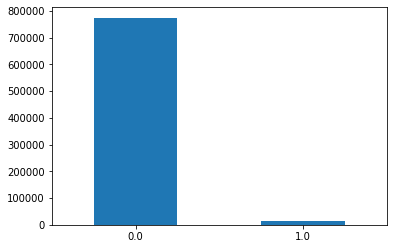

In [26]:
ax = class_count.plot.bar(x='Label', rot=0)

In [27]:
data_vis = data_updated.drop(['isFraud'], axis=1)

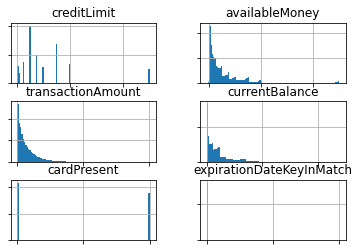

In [28]:
#visualizing the class distribution

ax = data_vis.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    
    
#show the plot
plt.show()

In [29]:
#transaction total histogram
transaction = data_updated['transactionAmount'].values

In [30]:
#distribuition of the data\n",

mu = transaction.mean()
sigma = transaction.std()
print(mu,sigma)

136.98579095150708 147.72547508986275


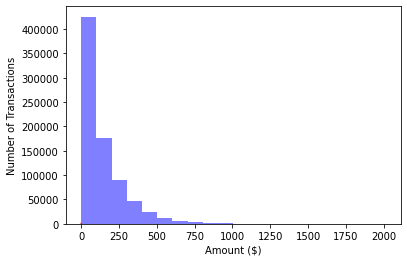

In [31]:
n, bins, patches = plt.hist(transaction, 20, facecolor='blue', alpha=0.5)
y = norm.pdf(bins, mu, sigma)
plt.plot(y, bins, 'r--')
plt.xlabel('Amount ($)')
plt.ylabel("Number of Transactions")
plt.show()

In [32]:
#data that is fraud
new_data = data_updated[data_updated['isFraud'] == True]['transactionAmount'].values

In [33]:
#checking if the new_dat avariables have the right values
print(new_data)

[165.26 298.85 406.89 ... 370.43  28.09 119.51]


In [34]:
print(type(new_data))

<class 'numpy.ndarray'>


In [35]:
#data that is not fraud

new_data1 = data_updated[data_updated['isFraud'] == False]['transactionAmount'].values

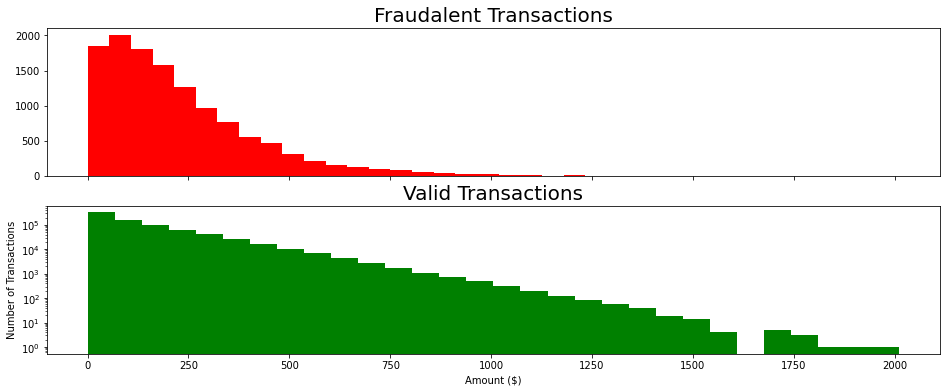

In [36]:
#plotting the transaction amount for fradulent and valid transactions\n",

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.hist(new_data, bins = 30, color='red')
ax1.set_title('Fraudalent Transactions', fontsize=20)

ax2.hist(new_data1, bins = 30, color='green')
ax2.set_title('Valid Transactions', fontsize=20)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [37]:
#checking the datatype of the date-time feature
test_var = data_updated['transactionDateTime'][0]
print(test_var)
print(type(test_var))

2016-08-13T14:27:32
<class 'str'>


In [38]:
#converting the feature to date-time object
data_updated['transactionDateTime'] = pd.to_datetime(data_updated['transactionDateTime'], format='%Y-%m-%dT%H:%M:%S')

In [39]:
#checking for the date-time object
test_var = data_updated['transactionDateTime'][0]
print(test_var)
print(type(test_var))

2016-08-13 14:27:32
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [40]:
sorted_date = data_updated.sort_values(by = ['accountNumber', 'transactionDateTime'], ascending = True)

In [41]:
sorted_date.head(10)

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
541900,100088067,50000.0,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,US,US,02,01,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,1.0,0.0,0.0
541901,100088067,50000.0,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,01,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,205.13,1.0,0.0,0.0
541902,100088067,50000.0,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,US,US,05,01,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,251.56,0.0,0.0,0.0
541903,100088067,50000.0,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,US,US,02,01,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,1.0,0.0,0.0
541904,100088067,50000.0,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,66.07,1.0,0.0,0.0
541905,100088067,50000.0,49792.33,2016-02-08 06:09:12,259.44,Blue Mountain eCards,US,US,05,01,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,207.67,0.0,0.0,0.0
541906,100088067,50000.0,49532.89,2016-02-09 18:36:53,32.50,EZ Putt Putt #804489,US,US,09,01,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,467.11,1.0,0.0,0.0
541907,100088067,50000.0,49500.39,2016-02-09 23:44:13,23.06,South Cafe,US,US,02,01,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,499.61,1.0,0.0,0.0
541908,100088067,50000.0,49477.33,2016-02-13 20:17:41,56.05,Fresh Flowers,US,US,05,01,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,522.67,0.0,0.0,0.0
541909,100088067,50000.0,49421.28,2016-02-21 01:14:56,71.35,AMC #724446,US,US,09,01,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,578.72,1.0,1.0,0.0


In [42]:
data_updated.head(10)

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000.0,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,0.0,0.0,0.0
1,737265056,5000.0,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,1.0,0.0,0.0
2,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,0.0,0.0,0.0
3,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,0.0,0.0,0.0
4,830329091,5000.0,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,1.0,0.0,0.0
5,830329091,5000.0,5000.00,2016-04-19 16:24:27,30.76,In-N-Out #422833,US,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,1.0,0.0,0.0
6,830329091,5000.0,5000.00,2016-05-21 14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,1.0,0.0,0.0
7,830329091,5000.0,5000.00,2016-06-03 00:31:21,9.37,Shake Shack #968081,US,US,05,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,1.0,0.0,0.0
8,830329091,5000.0,4990.63,2016-06-10 01:21:46,523.67,Burger King #486122,unknown,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,9.37,1.0,0.0,0.0
9,830329091,5000.0,5000.00,2016-07-11 10:47:16,164.37,Five Guys #510989,US,US,05,08,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,1.0,0.0,0.0


In [43]:
#time varibale series and then converting it 

#first creating a copy of the data and dropping the timecolumn
new_data = sorted_date.copy()
time_series = new_data['transactionDateTime']
print(type(time_series))
new_data = new_data.drop(['transactionDateTime'], axis = 1)

print(len(time_series))

<class 'pandas.core.series.Series'>
786363


In [44]:
new_data = new_data.reset_index()

In [45]:
new_data = new_data.drop(['index'], axis = 1)

In [46]:
new_data.head(10)

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,100088067,50000.0,50000.00,205.13,EZ Putt Putt #982199,US,US,02,01,entertainment,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,1.0,0.0,0.0
1,100088067,50000.0,49794.87,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,01,food,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,205.13,1.0,0.0,0.0
2,100088067,50000.0,49748.44,378.67,Mobile eCards,US,US,05,01,online_gifts,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,251.56,0.0,0.0,0.0
3,100088067,50000.0,50000.00,66.07,EZ Putt Putt #40513,US,US,02,01,entertainment,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,1.0,0.0,0.0
4,100088067,50000.0,49933.93,141.60,34th BBQ #412895,US,US,09,08,food,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,66.07,1.0,0.0,0.0
5,100088067,50000.0,49792.33,259.44,Blue Mountain eCards,US,US,05,01,online_gifts,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,207.67,0.0,0.0,0.0
6,100088067,50000.0,49532.89,32.50,EZ Putt Putt #804489,US,US,09,01,entertainment,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,467.11,1.0,0.0,0.0
7,100088067,50000.0,49500.39,23.06,South Cafe,US,US,02,01,food,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,499.61,1.0,0.0,0.0
8,100088067,50000.0,49477.33,56.05,Fresh Flowers,US,US,05,01,online_gifts,...,2014-01-09,2014-01-09,402,402,2077,PURCHASE,522.67,0.0,0.0,0.0
9,100088067,50000.0,49421.28,71.35,AMC #724446,US,US,09,01,entertainment,...,2014-01-09,2014-01-09,546,546,4615,PURCHASE,578.72,1.0,1.0,0.0


In [47]:
drop_list = []

In [48]:

for i in range(1, len(time_series)-1):
    diff = time_series[i] - time_series[i-1]
    if diff.days == 0 and diff.seconds < 21000:
        a = new_data.iloc[i-1].values
        #a = a.tolist()
        #print(a, time_series[i-1])
        b = new_data.iloc[i].values
        #b = b.tolist()
        #print(b, time_series[i])
        if np.array_equal(a, b):
            drop_list.append(i)

In [49]:
#checking the total number of duplicates
print(len(drop_list))

563


In [50]:
#original transaction - not counted

new_data.iloc[782561]

accountNumber                996024442
creditLimit                     2500.0
availableMoney                  2500.0
transactionAmount                  6.7
merchantName                Play Store
acqCountry                          US
merchantCountryCode                 US
posEntryMode                        09
posConditionCode                    08
merchantCategoryCode        mobileapps
currentExpDate                 04/2025
accountOpenDate             2009-10-11
dateOfLastAddressChange     2009-10-11
cardCVV                            432
enteredCVV                         432
cardLast4Digits                   6065
transactionType               PURCHASE
currentBalance                     0.0
cardPresent                        0.0
expirationDateKeyInMatch           0.0
isFraud                            0.0
Name: 782561, dtype: object

In [51]:
new_data.iloc[782562]

accountNumber                996024442
creditLimit                     2500.0
availableMoney                  2500.0
transactionAmount                  6.7
merchantName                Play Store
acqCountry                          US
merchantCountryCode                 US
posEntryMode                        09
posConditionCode                    08
merchantCategoryCode        mobileapps
currentExpDate                 04/2025
accountOpenDate             2009-10-11
dateOfLastAddressChange     2009-10-11
cardCVV                            432
enteredCVV                         432
cardLast4Digits                   6065
transactionType               PURCHASE
currentBalance                     0.0
cardPresent                        0.0
expirationDateKeyInMatch           0.0
isFraud                            0.0
Name: 782562, dtype: object

In [52]:
#reverse count for a transaction

print(pd.value_counts(data_updated['transactionType'], sort=True))

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
unknown                    698
Name: transactionType, dtype: int64


In [53]:
reversal_index = new_data[new_data['transactionType']=='REVERSAL'].index
inter_data = new_data.drop(['transactionType', 'isFraud'],axis = 1)
print(len(reversal_index))
print(len(inter_data))

20303
786363


In [54]:
reverse_list = []
for i in range(len(reversal_index)):
    index_val = reversal_index[i]
    if new_data.iloc[index_val-1].transactionType == "PURCHASE":
        a = inter_data.iloc[index_val-1].values
        b = inter_data.iloc[index_val].values
        if np.array_equal(a, b):
            reverse_list.append(index_val-1)

In [55]:
print(reverse_list)
print(len(reverse_list))

[77018, 159079, 211977, 289266, 359013, 458728, 479803, 489820, 516600, 627427, 660447, 677193, 715371, 771252]
14


In [56]:
#example of the data

print(new_data.iloc[677193])

accountNumber                          866629274
creditLimit                                250.0
availableMoney                             250.0
transactionAmount                         300.62
merchantName                EZ Putt Putt #240241
acqCountry                                    US
merchantCountryCode                           US
posEntryMode                                  09
posConditionCode                              01
merchantCategoryCode               entertainment
currentExpDate                           09/2028
accountOpenDate                       2014-07-11
dateOfLastAddressChange               2014-07-11
cardCVV                                      664
enteredCVV                                   664
cardLast4Digits                             3645
transactionType                         PURCHASE
currentBalance                               0.0
cardPresent                                  1.0
expirationDateKeyInMatch                     0.0
isFraud             

In [57]:
#example of the transaction reversal

print(new_data.iloc[677194])

accountNumber                          866629274
creditLimit                                250.0
availableMoney                             250.0
transactionAmount                         300.62
merchantName                EZ Putt Putt #240241
acqCountry                                    US
merchantCountryCode                           US
posEntryMode                                  09
posConditionCode                              01
merchantCategoryCode               entertainment
currentExpDate                           09/2028
accountOpenDate                       2014-07-11
dateOfLastAddressChange               2014-07-11
cardCVV                                      664
enteredCVV                                   664
cardLast4Digits                             3645
transactionType                         REVERSAL
currentBalance                               0.0
cardPresent                                  1.0
expirationDateKeyInMatch                     0.0
isFraud             

In [58]:
#counting total amounts for each type of reversal

amount_drop = 0
for i in drop_list:
    amount_drop += new_data.iloc[i].transactionAmount

print("Total transaction amount for multi - swap transactions $:", amount_drop)

Total transaction amount for multi - swap transactions $: 6820.00000000001


In [59]:
#counting total amounts for reversed transactions

reverse_amount = 0
for i in reverse_list:
    reverse_amount += new_data.iloc[i].transactionAmount

print("Total transaction amount for reversed transactions $:", reverse_amount)

Total transaction amount for reversed transactions $: 2416.31


In [60]:
##making sure to replace the string object and converting it to a numeric value with label-encoder

for col in new_data.columns:
    if new_data[col].dtype == "object":
        le = LabelEncoder()
        new_data[col].fillna("None", inplace=True)
        le.fit(list(new_data[col].astype(str).values))
        new_data[col] = le.transform(list(new_data[col].astype(str).values))
    else:
        new_data[col].fillna(-999, inplace=True)

In [61]:
#isolation forest algorithm data pre-processing

#dropping the Unnecessary columns from the data
new_data = new_data.drop(['cardLast4Digits', 'dateOfLastAddressChange', 'accountOpenDate', 'currentExpDate'], axis = 1)


#preparing the data
Y = new_data['isFraud']
data_valid = new_data.drop(['isFraud'], axis = 1)

print(data_valid.shape)

state = np.random.RandomState(42)

(786363, 16)


In [62]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(data_valid), 
                                       contamination=contamination,random_state=state, verbose=0),
   
}

In [63]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(data_valid)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(data_valid)
        y_pred = clf.predict(data_valid)
    else:    
        clf.fit(data_valid)
        scores_prediction = clf.decision_function(data_valid)
        y_pred = clf.predict(data_valid)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 24166
Accuracy Score :
0.9692686456509271
Classification Report :
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    773946
         1.0       0.03      0.03      0.03     12417

    accuracy                           0.97    786363
   macro avg       0.51      0.51      0.51    786363
weighted avg       0.97      0.97      0.97    786363



In [64]:
##experimenting with hybrid approach, downsampling and then using SMOTE
#random forest classification method using 

##smmote techinque for preprocessing data


In [65]:
#first downsampling the original data 

valid_index = new_data[new_data['isFraud'] == 0].index
print(len(valid_index))

773946


In [66]:
totals = int((len(valid_index))*0.6)

In [67]:
print(totals)

464367


In [68]:
random_indices = np.random.choice( valid_index, totals , replace=False)

In [69]:
print(len(random_indices))

464367


In [70]:
fraud_index = new_data[new_data['isFraud'] == 1].index
print(len(fraud_index))

12417


In [71]:
total_index = np.concatenate([random_indices,fraud_index])

In [72]:
total_data = new_data.iloc[total_index]
print(total_data.shape)

(476784, 17)


In [73]:
Y = total_data['isFraud']
X = total_data.drop(['isFraud'], axis = 1)

In [74]:
sm = SMOTE(sampling_strategy = 0.3, random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [75]:
print(len(X_res))
print(len(y_res))
print(X_res.shape)
print(y_res.shape)

603677
603677
(603677, 16)
(603677,)


In [76]:
counts_new = y_res.value_counts()
print(y_res.value_counts())
print(type(counts_new))

0.0    464367
1.0    139310
Name: isFraud, dtype: int64
<class 'pandas.core.series.Series'>


In [78]:
contant_new = counts_new[1]/(len(y_res))
print(contant_new)

0.23076910334500073


In [79]:
classifiers_new = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X_res), 
                                       contamination=contant_new,random_state=state, verbose=0),
   
}

In [80]:
#checking the algorithm after applying sampling methods

for i, (clf_name,clf) in enumerate(classifiers_new.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_res)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_res)
        y_pred = clf.predict(X_res)
    else:    
        clf.fit(X_res)
        scores_prediction = clf.decision_function(X_res)
        y_pred = clf.predict(X_res)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_res).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_res,y_pred))
    print("Classification Report :")
    print(classification_report(y_res,y_pred))

Isolation Forest: 218846
Accuracy Score :
0.6374783203600601
Classification Report :
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76    464367
         1.0       0.21      0.21      0.21    139310

    accuracy                           0.64    603677
   macro avg       0.49      0.49      0.49    603677
weighted avg       0.64      0.64      0.64    603677



In [83]:
train, test, train_label, test_label = train_test_split(X_res, y_res, test_size=0.2, random_state = 42)

In [84]:
print(train.shape)
print(test.shape)
print(train_label.shape)
print(test_label.shape)

(482941, 16)
(120736, 16)
(482941,)
(120736,)


In [85]:
print(test_label.value_counts())

0.0    92923
1.0    27813
Name: isFraud, dtype: int64


In [86]:
##random forest algorithm

model = RandomForestClassifier()
model.fit(train, train_label)


RandomForestClassifier()

In [87]:
train_pred = model.predict(train)


In [88]:
train_label = train_label.values

In [89]:
#training accuracy of the model

print(accuracy_score(train_label,train_pred))
print(classification_report(train_label,train_pred))

0.9999958587073783
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    371444
         1.0       1.00      1.00      1.00    111497

    accuracy                           1.00    482941
   macro avg       1.00      1.00      1.00    482941
weighted avg       1.00      1.00      1.00    482941



In [90]:
y_pred = model.predict(test)

In [91]:
print(type(y_pred))
test_label = test_label.values
print(type(test_label))
print(test_label)
print(y_pred)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0. 1. 0. ... 0. 0. 1.]
[0. 1. 0. ... 0. 0. 1.]


In [92]:
print(accuracy_score(test_label,y_pred))
print(classification_report(test_label,y_pred))

0.9584796580970051
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     92923
         1.0       0.95      0.86      0.91     27813

    accuracy                           0.96    120736
   macro avg       0.96      0.92      0.94    120736
weighted avg       0.96      0.96      0.96    120736

